<a href="https://colab.research.google.com/github/diogosec/Statistics-Applied-to-Computing/blob/main/Projeto-emails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Projeto: Análise Exploratória do Email Pessoal

*Baseado no código do capítulo 3 do livro "Hands on Exploratory Data Analysis with Python", com os códigos disponíveis no [github](https://github.com/PacktPublishing/Hands-on-Exploratory-Data-Analysis-with-Python)*.

#### Objetivo: extrair e pre-processar dados do email pessoal do gmail, para responder perguntas sobre os dados obtidos

OBS: por questões técnicas não foi possível utilizar o email pessoal, detalhes na resolução da questão 3.

# Diogo da Silva Santos

## Pré processamento dos dados do Email:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import mailbox

In [ ]:
mbox = mailbox.mbox('/content/drive/MyDrive/Takeout/Takeout/E-mail/Todos os e-mails.mbox')
mbox

In [ ]:
for chaves in mbox[0]: print(chaves)

X-GM-THRID
X-Gmail-Labels
Delivered-To
Received
X-Google-Smtp-Source
X-Received
ARC-Seal
ARC-Message-Signature
ARC-Authentication-Results
Return-Path
Received
Received-SPF
Authentication-Results
X-MSFBL
DKIM-Signature
Authentication-Results
Received
Date
From
To
Message-ID
Subject
Mime-Version
Content-Type
Content-Transfer-Encoding


In [ ]:
import csv

with open('emails.csv', 'w') as outputfile:
  writer = csv.writer(outputfile)
  writer.writerow(['subject','from','date','to',
                   'label','thread'])
    
  for message in mbox:
    writer.writerow([message['subject'], message['from'],  
                     message['date'], message['to'],  
                     message['X-Gmail-Labels'], message['X-GM-THRID']])

In [ ]:
df = pd.read_csv('emails.csv')

In [ ]:
df['date'] = df['date'].apply(lambda x: pd.to_datetime(x, 
                                                       errors='coerce', 
                                                       utc=True))

In [ ]:
import re

In [ ]:
def extracao_email(string):
  email = re.findall(r'<(.+?)>', string) #aqui está a expressão regular
  if not email:
    email = list(filter(lambda y: '@' in y, string.split()))
  return email[0] if email else np.nan #se tiver email, ok; senão, retorna nan.

In [ ]:
df['from'] = df['from'].apply(lambda x: extracao_email(x))

In [ ]:
df['label'] = df['from'].apply(lambda x: 
                               'enviado' if x=='santo.diogo@academico.ifpb.edu.br' else 'inbox')

In [ ]:
import datetime
import pytz

In [ ]:
def ref_timezone(x): return x.astimezone(pytz.timezone('America/Recife'))

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['dayofweek'] = df['date'].apply(lambda x: x.day_name())

In [ ]:
df['dayofweek'] = pd.Categorical(df['dayofweek'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
    'Saturday', 'Sunday'], ordered=True)

In [ ]:
df['timeofday'] = df['date'].apply(lambda x: x.hour)

In [ ]:
df['year'] = df['date'].apply(lambda x: x.year)

In [ ]:
df['month'] = df['date'].apply(lambda x: x.month_name())

In [ ]:
df['month'] = pd.Categorical(df['month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July',
    'September', 'October', 'November', 'December'], ordered=True)

In [ ]:
df['day'] = df['date'].apply(lambda x: x.day)

In [ ]:
df['data_contraria'] = df["date"].apply( lambda df : 
datetime.datetime(year=df.year, month=df.month, day=df.day))
df.set_index(df["data_contraria"],inplace=True)

In [ ]:
df.to_csv('emails_processados.csv')

## 1. Quantos emails foram mandados por semana, por mês e por ano, considerando a janela de tempo dos dados baixados?

##### Emails enviados por semana:

Lista com o número de emails:

In [ ]:
%matplotlib inline
df_semana = df['data_contraria'].dt.week.value_counts().sort_index(ascending=True)
dados = {'Emails por semana':df_semana}
df_semana = pd.DataFrame(dados)
df_semana

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,Emails por semana
1,7
2,4
3,8
4,35
5,35
6,50
7,33
8,49
9,36
10,46


Gráfico:

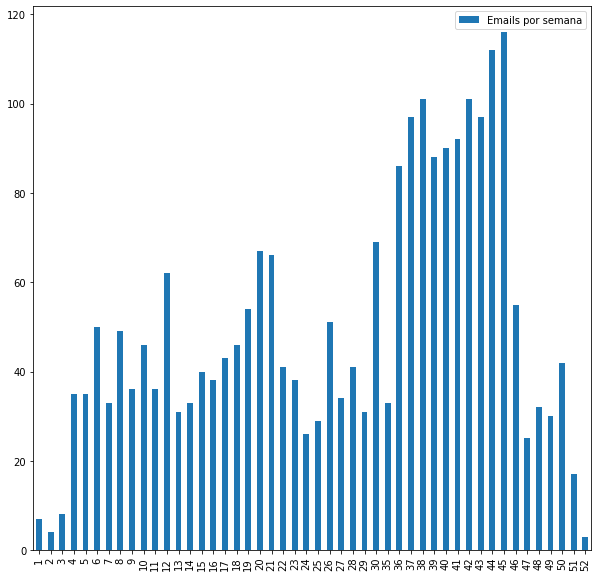

In [ ]:
df_semana.plot.bar(figsize= (10,10))

##### Emails enviados por mês:

Lista com o número de emails:

In [ ]:
df_mes = df['data_contraria'].dt.month.value_counts().sort_index(ascending=True)
dados = {'Emails por mês':df_mes}
df_mes = pd.DataFrame(dados)

Gráfico:

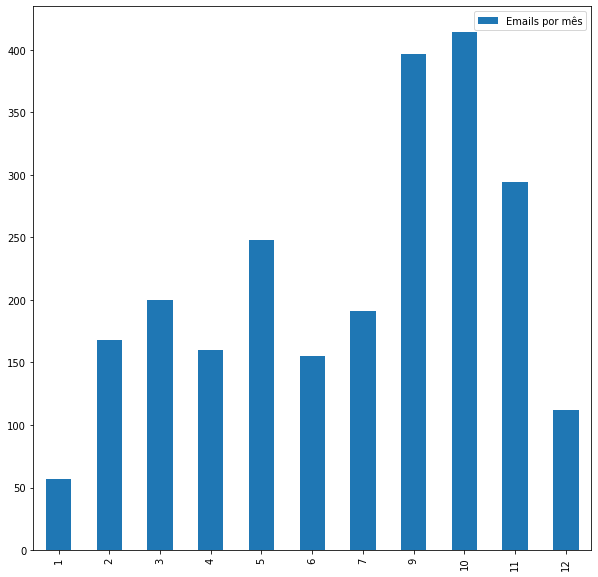

In [ ]:
df_mes.plot.bar(figsize= (10,10))

##### Emails enviados por ano:

Lista com o número de emails:

In [ ]:
df_ano = df['data_contraria'].dt.year.value_counts().sort_index(ascending=True)
dados = {'Emails por ano':df_ano}
df_ano = pd.DataFrame(dados)

Gráfico:

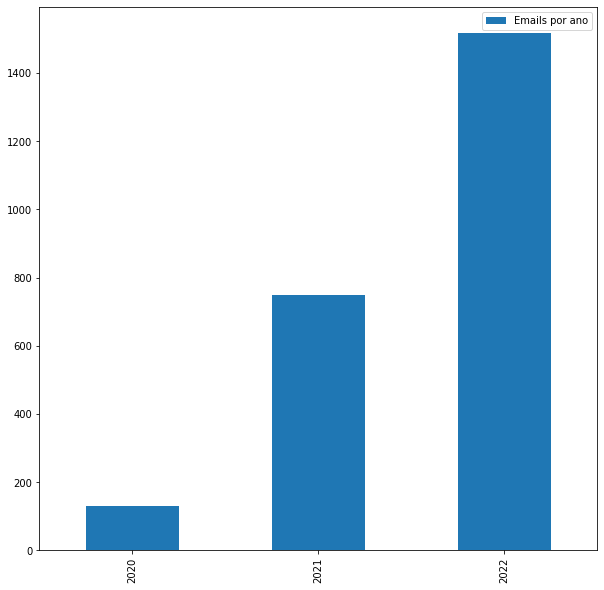

In [ ]:
df_ano.plot.bar(figsize= (10,10))

## 2. Há uma variação significativa na quantidade de emails enviados por cada período considerado na questão anterior?

Existe. É visto que em setembro ocorreu um aumento no número de emails recebidos, pois me inscrevi no Microsoft Reactor, uma plataforma de eventos online.

Na análise anual, é visto que o número de emails recebidos aumenta a cada ano, visto que 2022 não se encerrou, recebi quase o dobro de emails em relação a 2021

## 3. Existe algum período, dos considerados nas duas questões anteriores, em que o número de emails enviados possa ser considerado um outlier? Você enxerga alguma justificativa para esse período ter esse outlier, caso haja?

Sim, pois estou usando cada vez mais esse novo email, trazendo novos remetentes.

O mês de agosto (8) não aparece no gráfico, certamente por conta do recesso acadêmico que houve na época, a fins informativos, utilizei o email acadêmico para análise pois meu drive pessoal está muito cheio, impossibilitando de upar os dados do meu email para lá para o próprio drive, que seria usado pelo google COLAB.

## 4. Qual é o número médio de e-mails por hora? Essa média varia ao longo da semana?

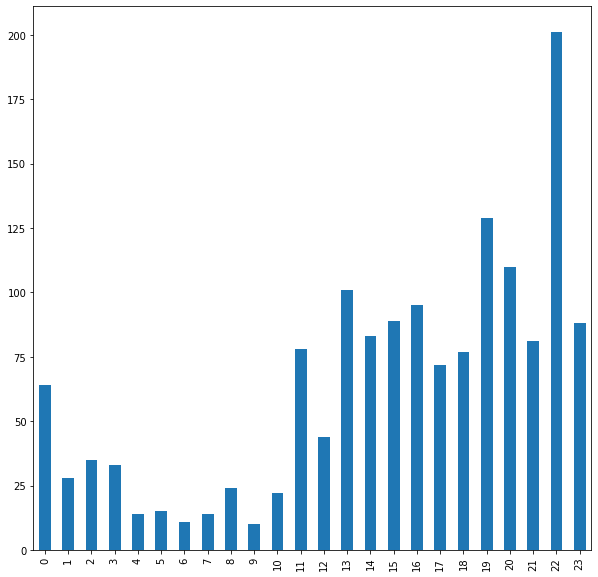

In [ ]:
emails_hora = df_horas['timeofday'].value_counts().sort_index(ascending=True)
emails_hora.plot.bar(figsize= (10,10))

Acima, podemos ver o gráfico de números de emails por hora. Percebemos que das 1:00 até as 10:00 o número de emails recebidos caem muito, aumentando a partir das 11:00. O número de emails recebidos não tem estabilidade, as 22:00 o número de emails recebidos chega a seu pico, totalizando mais de 200 emails recebidos por ano nesse horário.



Lista com o número de emails recebidos em cada hora:

In [ ]:
dados = {'Emails por hora': emails_hora}
emails_hora = pd.DataFrame(dados)
emails_hora

,Emails por hora
0,64
1,28
2,35
3,33
4,14
5,15
6,11
7,14
8,24
9,10


Média de emails recebidos por dia e por hora:

In [ ]:
total_dia = emails_hora.sum()/365
total_dia

Emails por hora    4.158904
dtype: float64

No ano de 2022, recebemos cerca de 5 emails por dia, aproximadamente

In [ ]:
total_dia/24

Emails por hora    0.173288
dtype: float64

Em um dia no ano de 2022, recebemos em média cerca de 0.20 emails por hora. (1 email a cada 5 horas, aproximadamente)

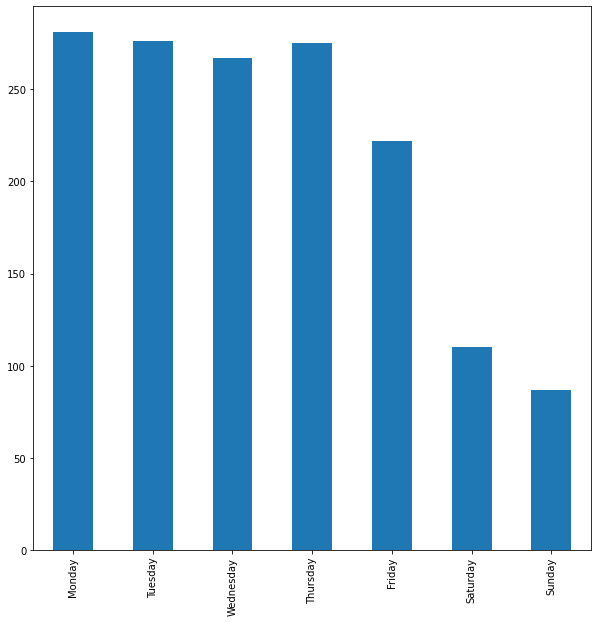

In [ ]:
dias_semana = df_horas['dayofweek'].value_counts().sort_index(ascending=True).plot.bar(figsize= (10,10))
dias_semana

Pelo gráfico, percebemos uma variação na média diária. O número de emails diminui no decorrer da semana comercial que começa na segunda - feira, que é o dia com o maior número de emails recebidos, na quinta - feira há um aumento fora da curva, posteriormente o número diminui drasticamente no final de semana.

## 5. Com quem me comunico com mais frequência, por meio de emails? Considere tanto por envio, quanto por recepção de emails;

In [ ]:
df['from'].value_counts().head(10)

jobalerts-noreply@linkedin.com            296
info@email.meetup.com                     187
team@datacamp.com                         153
no-reply+e0ef386d@classroom.google.com    105
nao-responder@email.ifpb.edu.br            98
no-reply+5123562e@classroom.google.com     72
no-reply+65a1defa@classroom.google.com     69
no-reply@classroom.google.com              67
no-reply+98d363cc@classroom.google.com     64
no-reply+bece8ff9@classroom.google.com     58
Name: from, dtype: int64

Notificações automáticas do Linkedin e MicroSoft Reactor lideram a lista.

## 6. Quais os temas mais comumente tratados nos emails considerados? (para esse caso, considere usar uma nuvem de palavras como gráfico; para saber mais, veja esse tutorial da Sigmoidal, um tutorial do Datacamp e o Python Graph Gallery);

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

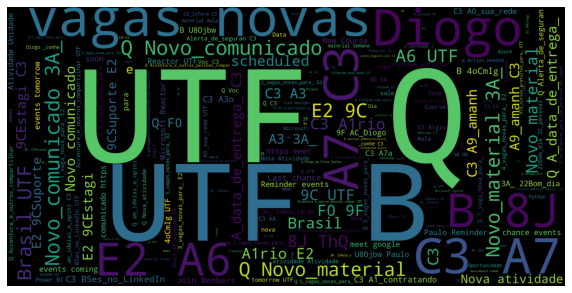

In [ ]:
def nuvem_imagem(df):
    summary = df.dropna(subset=['subject'], axis=0)['subject']

    all_summary = " ".join(s for s in summary)

    stopwords = set(STOPWORDS)

    # Adicionei algumas palavras que atrapalhavam a exibição da nuvem, deixando apenas os assuntos aparecerem.
    stopwords.update(["da", "meu", "em", "você", "de", "ao", "os","um","uma","enviar","vídeo","enviou","Mensagem","Direta","acabou","está"])

    # gerar uma wordcloud
    wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_summary)

    # mostrar a imagem final
    fig, ax = plt.subplots(figsize=(10,6))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_axis_off()

    plt.imshow(wordcloud);
    wordcloud.to_file("wordcloud.png")
    
nuvem_imagem(df)

Nessa imagem, podemos ver os temas que mais aparecem no meu email desde o ano de 2022. Temos a ocorrencia de termos como: "UTF Q" e "UTF B", provavelmente pelo fato de alguns remetentes enviarem emojis nos títulos dos emails, em seguida temos a frase "Vagas Novas" do Linkedin

## 7. Crie e responda mais duas perguntas relacionadas aos dados obtidos. Seja criativo!

### Pergunta 1: Quantos emails automáticos o AVA/Moodle me enviou por ano?

In [ ]:
# Criando dataframe apenas com os emails do AVA
df_linke = df.loc[df['from'] == 'nao-responder@email.ifpb.edu.br']

In [ ]:
#Criando dataframe apenas com a contagem de emails enviados pelo AVA.
df_linke = df_linke['data_contraria'].dt.year.value_counts().sort_index(ascending=True)
dados = {'Emails por ano':df_linke}
df_linke = pd.DataFrame(dados)
df_linke

,Emails por ano
2021,29
2022,69


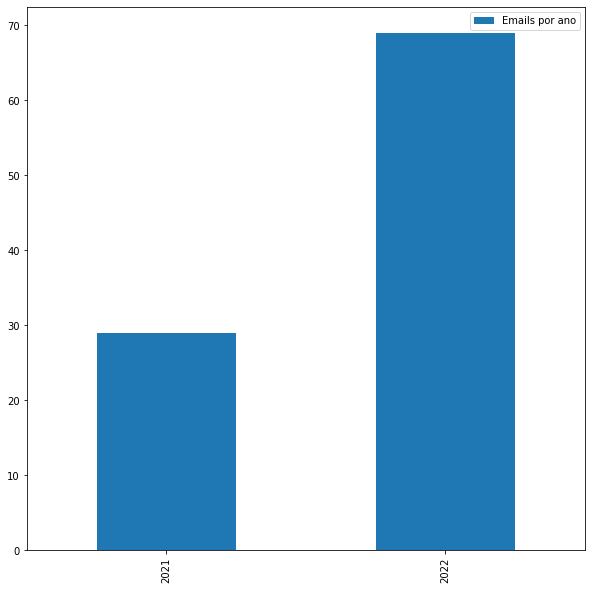

In [ ]:
df_linke.plot.bar(figsize= (10,10))

### Pergunta 2: Quais foram os assuntos principais do seu email no ano de 2021?

In [ ]:
df_2021 = df.loc[df['year'] == 2021]
df_2021['from'].value_counts().head(10)

no-reply+98d363cc@classroom.google.com    64
team@datacamp.com                         64
no-reply+2eb1e244@classroom.google.com    57
no-reply+e0ef386d@classroom.google.com    51
no-reply+bece8ff9@classroom.google.com    44
no-reply+39a77bff@classroom.google.com    44
no-reply+8fb7d242@classroom.google.com    37
no-reply+fabfbb7a@classroom.google.com    34
no-reply+5123562e@classroom.google.com    32
nao-responder@email.ifpb.edu.br           29
Name: from, dtype: int64

As notificações automáticas do Classroom estão de longe em primeiro lugar